<a href="https://colab.research.google.com/github/Charan-077/21083133_project_football/blob/main/Project_football_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as foot_ba_pd
import numpy as foot_ba_np
import matplotlib.pyplot as foot_ba_plt
import seaborn as foot_ba_sns
import sqlite3 as foot_ba_sqlite
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
def tables_in_sqlite_db(conn):
    cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [
        v[0] for v in cursor.fetchall()
        if v[0] != "sqlite_sequence"
    ]
    cursor.close()
    return tables

In [3]:
sqlite3_conn = foot_ba_sqlite.connect('/content/drive/MyDrive/Database/database.sqlite')

In [4]:
tables = tables_in_sqlite_db(sqlite3_conn)

In [5]:
tables

['betfront', 'football_data']

In [6]:
# Saving the raw data in a dictionary as pandas dataframes

foot_ba_dict = {}

for table in tables:
    foot_ba_dict[table] = foot_ba_pd.read_sql_query("SELECT * FROM '{}'".format(table), sqlite3_conn)

In [7]:
foot_ba = foot_ba_dict["football_data"]

In [8]:
foot_ba

,Season,Datetime,Div,Country,League,Referee,HomeTeam,AwayTeam,FTHG,FTAG,...,VCCD,VCCH,VCD,VCH,WHA,WHCA,WHCD,WHCH,WHD,WHH
0,2021,2021-05-31 23:00:00,ARG,Argentina,Primera Division,None,Independiente,Colon Santa FE,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,2021-05-31 19:00:00,ARG,Argentina,Primera Division,None,Racing Club,Boca Juniors,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,2021-05-31 02:30:00,USA,USA,MLS,None,Seattle Sounders,Austin FC,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/2021,2021-05-31 02:15:00,MEX,Mexico,Liga MX,None,Cruz Azul,Santos Laguna,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,2021-05-31 00:30:00,BRA,Brazil,Serie A,None,Internacional,Sport Recife,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190668,2000/2001,2000-07-29 00:00:00,F2,France,Division 2,None,Ajaccio,Le Mans,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190669,2000/2001,2000-07-29 00:00:00,SC0,Scotland,Premier League,Willie Young,St Mirren,Kilmarnock,0,1,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.25,2.40
190670,2000/2001,2000-07-28 00:00:00,F1,France,Le Championnat,None,Paris SG,Strasbourg,3,1,...,NaN,NaN,NaN,NaN,6.5,NaN,NaN,NaN,3.70,1.40
190671,2000/2001,2000-07-28 00:00:00,F1,France,Le Championnat,None,Marseille,Troyes,3,1,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,3.50,1.45


In [9]:
foot_ba["Country_League"] = foot_ba["Country"] + "_" + foot_ba["League"]

In [10]:
foot_ba["Country_League"]

0         Argentina_Primera Division
1         Argentina_Primera Division
2                            USA_MLS
3                     Mexico_Liga MX
4                     Brazil_Serie A
                     ...            
190668             France_Division 2
190669       Scotland_Premier League
190670         France_Le Championnat
190671         France_Le Championnat
190672             France_Division 2
Name: Country_League, Length: 190673, dtype: object

In [11]:
foot_ba.shape

(190673, 173)

In [12]:
foot_ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190673 entries, 0 to 190672
Columns: 173 entries, Season to Country_League
dtypes: float64(151), int64(4), object(18)
memory usage: 251.7+ MB


In [13]:
foot_ba.isnull().sum()

Season                 0
Datetime               0
Div                    0
Country                0
League                 0
                   ...  
WHCD              176267
WHCH              176267
WHD                43664
WHH                43664
Country_League         0
Length: 173, dtype: int64

In [14]:
def display_na_cols(df):
    with foot_ba_pd.option_context("display.min_rows", 50, "display.max_rows", 200, "display.max_columns", 5):
        display(df[df.columns[df.isna().any()]].isnull().sum())

In [15]:
# Create an id column tha represents the index from the very first dataset "foot_ba" (in case we need to relate somehow and also just to have an unique key-column per observation.)
foot_ba = foot_ba.reset_index().rename({"index":"index_id"},axis=1)

In [16]:
foot_ba_columns_1 = ["index_id", "Div", "Date", "Time", "HomeTeam", "AwayTeam", "FTHG", "FTAG", "Attendance", "Referee", "HS", "AS", "HST", "AST", "HHW", "AHW", "HC", "HF", "AF", "HFKC", "AFKC", "AO", "HY", "AY", "HR", "AR", "HBP", "ABP", "HTHG", "HTAG", "HTR", "FTR"]

In [17]:
foot_ba_1 = foot_ba[foot_ba_columns_1]

In [18]:
foot_ba_1.dtypes

index_id        int64
Div            object
Date           object
Time           object
HomeTeam       object
AwayTeam       object
FTHG            int64
FTAG            int64
Attendance    float64
Referee        object
HS            float64
AS            float64
HST           float64
AST           float64
HHW           float64
AHW           float64
HC            float64
HF            float64
AF            float64
HFKC          float64
AFKC          float64
AO            float64
HY            float64
AY            float64
HR            float64
AR            float64
HBP           float64
ABP           float64
HTHG            int64
HTAG            int64
HTR            object
FTR            object
dtype: object

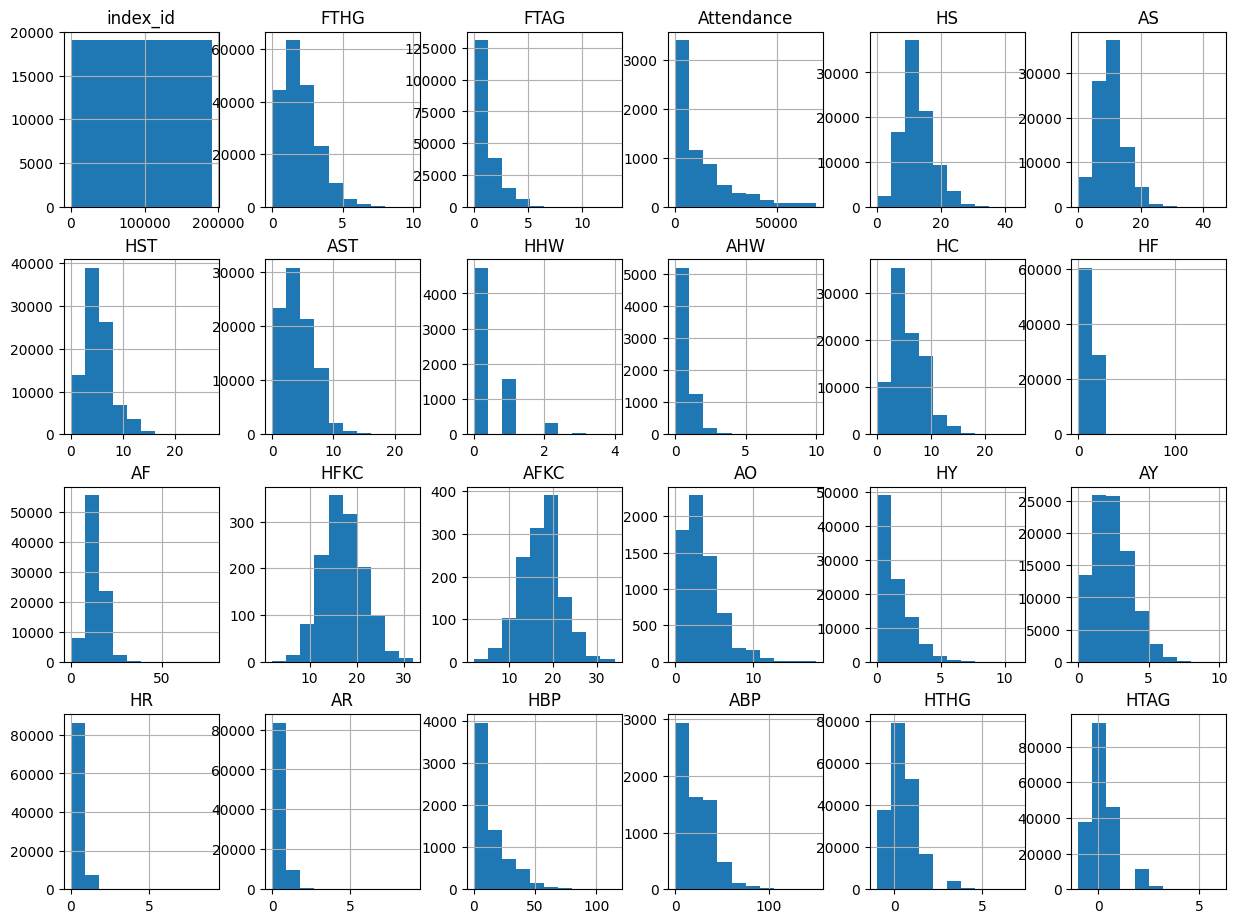

In [19]:
# Plotting distribution of numerical columns
foot_ba_1.hist(layout = (7,6), figsize=(15,20))

foot_ba_plt.show()

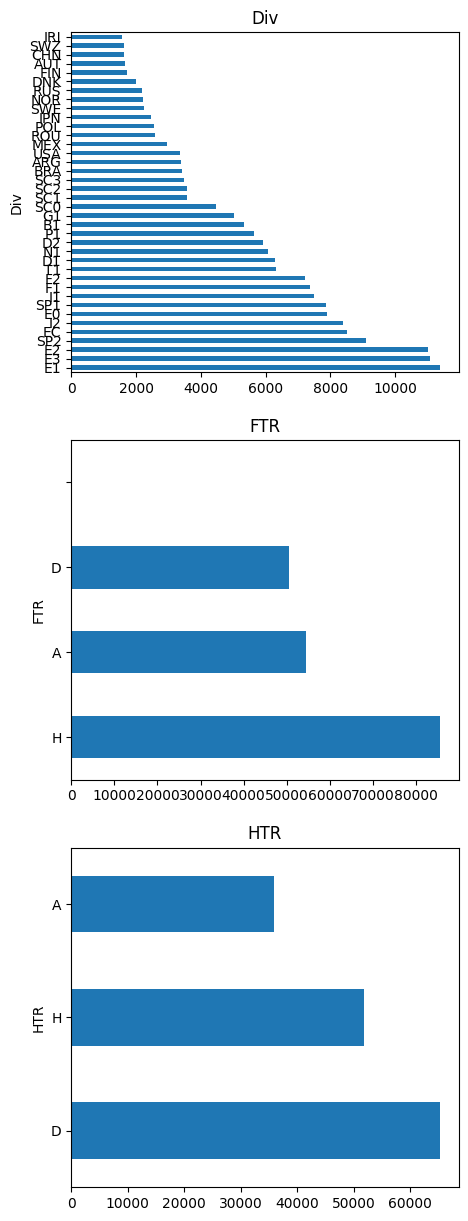

In [20]:
cat_feat = ["Div", "FTR", "HTR"]

fig, ax = foot_ba_plt.subplots(nrows=len(cat_feat), ncols=1, figsize=(5,15))

for i, categorical_feature in enumerate(foot_ba_1[cat_feat]):
    foot_ba_1[categorical_feature].value_counts().plot(kind="barh", ax=ax[i]).set_title(categorical_feature)

fig.show()

At the Half Time, most games are still on Draw, whereas at Full-Time, most games are won by the home team.

Handling Missing Values

In [21]:
display_na_cols(foot_ba_1)

Attendance    183857
Referee       133862
HS             99384
AS             99381
HST           100190
AST           100187
HHW           184018
AHW           184018
HC             99756
HF            101478
AF            101478
HFKC          189339
AFKC          189339
AO            184017
HY             96607
AY             96606
HR             96606
AR             96608
HBP           183846
ABP           183846
HTR            37669
dtype: int64

In [22]:
foot_ba_1[foot_ba_1.isna().any(axis=1)]

,index_id,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,Attendance,Referee,...,HY,AY,HR,AR,HBP,ABP,HTHG,HTAG,HTR,FTR
0,0,ARG,2021-05-31 00:00:00,23:00,Independiente,Colon Santa FE,0,2,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,A
1,1,ARG,2021-05-31 00:00:00,19:00,Racing Club,Boca Juniors,0,0,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,D
2,2,USA,2021-05-31 00:00:00,02:30,Seattle Sounders,Austin FC,0,0,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,D
3,3,MEX,2021-05-31 00:00:00,02:15,Cruz Azul,Santos Laguna,1,1,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,D
4,4,BRA,2021-05-31 00:00:00,00:30,Internacional,Sport Recife,2,2,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,None,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190668,190668,F2,2000-07-29 00:00:00,00:00,Ajaccio,Le Mans,1,0,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,H,H
190669,190669,SC0,2000-07-29 00:00:00,00:00,St Mirren,Kilmarnock,0,1,7388.0,Willie Young,...,1.0,2.0,0.0,0.0,10.0,20.0,0,0,D,A
190670,190670,F1,2000-07-28 00:00:00,00:00,Paris SG,Strasbourg,3,1,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,D,H
190671,190671,F1,2000-07-28 00:00:00,00:00,Marseille,Troyes,3,1,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,H,H


In [23]:
foot_ba_1.value_counts("HTHG", sort=False)

HTHG
-1    37669
 0    79303
 1    52364
 2    16873
 3     3721
 4      636
 5       96
 6        9
 7        2
Name: count, dtype: int64

In [24]:
foot_ba_1.value_counts("HTAG", sort=False)

HTAG
-1    37669
 0    93478
 1    45873
 2    11346
 3     1998
 4      270
 5       36
 6        3
Name: count, dtype: int64